# Loading Data

In [13]:
from numbers import Number
from collections import defaultdict

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

import kosh
import math
import statistics
import numpy as np
import os
import sys


if sys.argv[1] == '-f':  # Not sure why this returns '-f' if no arguments are passed?
    spec_root = ''
    %matplotlib notebook
else:
    spec_root = sys.argv[1]  # Modify path for Python script since this is running within its own step

# Ensembles Initialization
database = os.path.join(spec_root, '../04_manage_data/data/ensembles_output.sqlite')
target_type = "csv_rec"
datastore = kosh.connect(database)
print("Kosh is ready!")

# Baseline Initialization
database_baseline = os.path.join(spec_root, '../01_baseline_simulation/baseline/data/baseline_output.sqlite')
datastore_baseline = kosh.connect(database_baseline)
group_id = '47bcda'
val = list(datastore_baseline.find(id_pool = group_id + '_0'))[0]
# Printing Attributes and Features
print('Attributes:')
print('\t',val.list_attributes())
print('\n')
print('Features Sets:')
print('\t',val.list_features())

x_true = val['physics_cycle_series/x_pos'][:]
y_true = val['physics_cycle_series/y_pos'][:]
z_true = val['physics_cycle_series/z_pos'][:]
time_true = val['physics_cycle_series/time'][:]

# Numerical Resolution Initialization
database_num_res = os.path.join(spec_root, '../01_baseline_simulation/num_res/data/num_res_output.sqlite')
datastore_num_res = kosh.connect(database_num_res)

Kosh is ready!
Attributes:
	 ['box_side_length', 'gravity', 'group_id', 'id', 'num_bounces', 'x_pos_final', 'x_pos_initial', 'x_rmse', 'x_vel_final', 'x_vel_initial', 'y_pos_final', 'y_pos_initial', 'y_rmse', 'y_vel_final', 'y_vel_initial', 'z_pos_final', 'z_pos_initial', 'z_rmse', 'z_vel_final', 'z_vel_initial']


Features Sets:
	 ['physics_cycle_series', 'physics_cycle_series/cycle', 'physics_cycle_series/time', 'physics_cycle_series/x_diff', 'physics_cycle_series/x_pos', 'physics_cycle_series/y_diff', 'physics_cycle_series/y_pos', 'physics_cycle_series/z_diff', 'physics_cycle_series/z_pos']


# Adding Data to Records

In [14]:
x_temp = []
y_temp = []
z_temp = []

x_mean = []
y_mean = []
z_mean = []
x_std = []
y_std = []
z_std = []

for i, t in enumerate(time_true):
    
    print(f'{i} of {len(time_true)}')
    
    for dataset in datastore.find(): # Each record is now a dataset

        x_pred = dataset['physics_cycle_series/x_pos'][i]
        y_pred = dataset['physics_cycle_series/y_pos'][i]
        z_pred = dataset['physics_cycle_series/z_pos'][i]

        x_temp.append(x_pred)
        y_temp.append(y_pred)
        z_temp.append(z_pred)

    x_mean.append(statistics.mean(x_temp))
    y_mean.append(statistics.mean(y_temp))
    z_mean.append(statistics.mean(z_temp))
    x_std.append(statistics.stdev(x_temp))
    y_std.append(statistics.stdev(y_temp))
    z_std.append(statistics.stdev(z_temp))

    x_temp = []
    y_temp = []
    z_temp = []

datastore.create(id = 'mean')
mean = list(datastore.find(id_pool = 'mean'))[0]
mean.add_curve(np.array(time_true).tolist(), "mean_data", 'time')
mean.add_curve(np.array(x_mean).tolist(), "mean_data", 'x_pos_mean')
mean.add_curve(np.array(y_mean).tolist(), "mean_data", 'y_pos_mean')
mean.add_curve(np.array(z_mean).tolist(), "mean_data", 'z_pos_mean')
mean.add_curve(np.array(x_std).tolist(), "mean_data", 'x_pos_std')
mean.add_curve(np.array(y_std).tolist(), "mean_data", 'y_pos_std')
mean.add_curve(np.array(z_std).tolist(), "mean_data", 'z_pos_std')

mean.add_curve(np.array([x_mean[i] + x_std[i] for i in range(len(time_true))]).tolist(), "mean_data", 'x_pos_mean_plus_std')
mean.add_curve(np.array([y_mean[i] + y_std[i] for i in range(len(time_true))]).tolist(), "mean_data", 'y_pos_mean_plus_std')
mean.add_curve(np.array([z_mean[i] + z_std[i] for i in range(len(time_true))]).tolist(), "mean_data", 'z_pos_mean_plus_std')
mean.add_curve(np.array([x_mean[i] - x_std[i] for i in range(len(time_true))]).tolist(), "mean_data", 'x_pos_mean_minus_std')
mean.add_curve(np.array([y_mean[i] - y_std[i] for i in range(len(time_true))]).tolist(), "mean_data", 'y_pos_mean_minus_std')
mean.add_curve(np.array([z_mean[i] - z_std[i] for i in range(len(time_true))]).tolist(), "mean_data", 'z_pos_mean_minus_std')

mean.add_curve(np.array([x_mean[i] + 2*x_std[i] for i in range(len(time_true))]).tolist(), "mean_data", 'x_pos_mean_plus_2std')
mean.add_curve(np.array([y_mean[i] + 2*y_std[i] for i in range(len(time_true))]).tolist(), "mean_data", 'y_pos_mean_plus_2std')
mean.add_curve(np.array([z_mean[i] + 2*z_std[i] for i in range(len(time_true))]).tolist(), "mean_data", 'z_pos_mean_plus_2std')
mean.add_curve(np.array([x_mean[i] - 2*x_std[i] for i in range(len(time_true))]).tolist(), "mean_data", 'x_pos_mean_minus_2std')
mean.add_curve(np.array([y_mean[i] - 2*y_std[i] for i in range(len(time_true))]).tolist(), "mean_data", 'y_pos_mean_minus_2std')
mean.add_curve(np.array([z_mean[i] - 2*z_std[i] for i in range(len(time_true))]).tolist(), "mean_data", 'z_pos_mean_minus_2std')


0 of 400
1 of 400
2 of 400
3 of 400
4 of 400
5 of 400
6 of 400
7 of 400
8 of 400
9 of 400
10 of 400
11 of 400
12 of 400
13 of 400
14 of 400
15 of 400
16 of 400
17 of 400
18 of 400
19 of 400
20 of 400
21 of 400
22 of 400
23 of 400
24 of 400
25 of 400
26 of 400
27 of 400
28 of 400
29 of 400
30 of 400
31 of 400
32 of 400
33 of 400
34 of 400
35 of 400
36 of 400
37 of 400
38 of 400
39 of 400
40 of 400
41 of 400
42 of 400
43 of 400
44 of 400
45 of 400
46 of 400
47 of 400
48 of 400
49 of 400
50 of 400
51 of 400
52 of 400
53 of 400
54 of 400
55 of 400
56 of 400
57 of 400
58 of 400
59 of 400
60 of 400
61 of 400
62 of 400
63 of 400
64 of 400
65 of 400
66 of 400
67 of 400
68 of 400
69 of 400
70 of 400
71 of 400
72 of 400
73 of 400
74 of 400
75 of 400
76 of 400
77 of 400
78 of 400
79 of 400
80 of 400
81 of 400
82 of 400
83 of 400
84 of 400
85 of 400
86 of 400
87 of 400
88 of 400
89 of 400
90 of 400
91 of 400
92 of 400
93 of 400
94 of 400
95 of 400
96 of 400
97 of 400
98 of 400
99 of 400
100 of 400

'mean_data/z_pos_mean_minus_2std'

# Plotting Options

In [15]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
scalars = ["x_pos_final", "y_pos_final", "z_pos_final"]
parameters = ['x_pos_initial', 'y_pos_initial', 'z_pos_initial', 'x_vel_initial', 'y_vel_initial', 'z_vel_initial']
convergence = [1, 2, 4, 8, 10] # 16, 32, 64, 128, 256, 512, 1024]
n_bins = int(math.sqrt(convergence[-1]))

# QoI transient data with uncertainty bounds

<IPython.core.display.Javascript object>


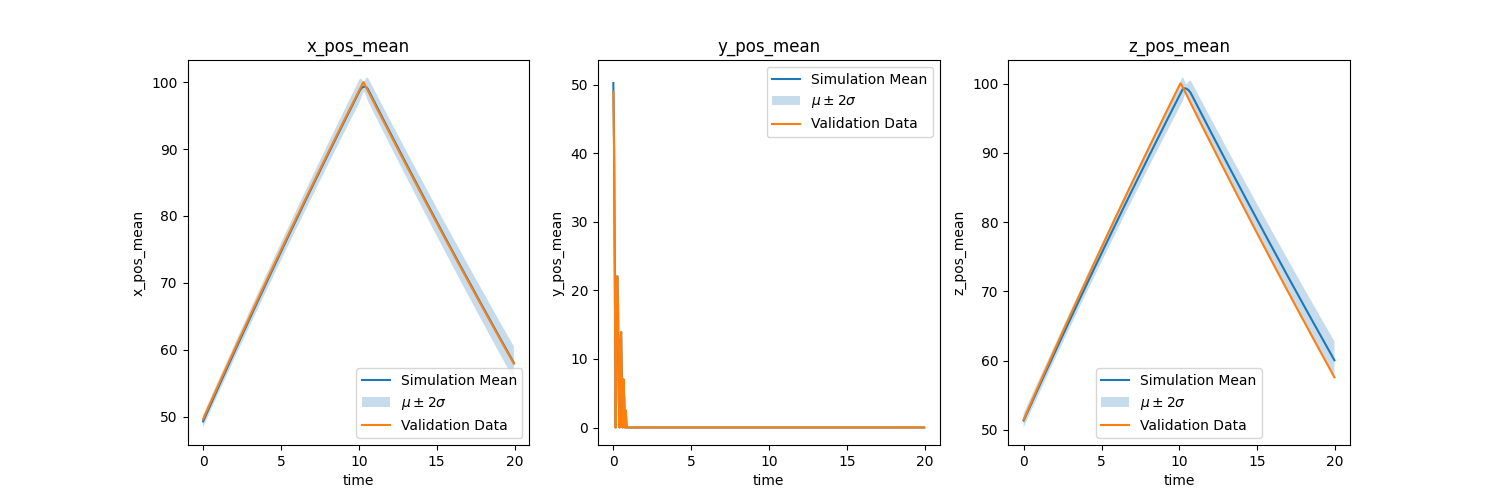

In [18]:
# Gathering Data

mean = list(datastore.find(id_pool = 'mean'))[0]

time = mean['mean_data/time'][:]

x_pos_mean = mean['mean_data/x_pos_mean'][:]
y_pos_mean = mean['mean_data/y_pos_mean'][:]
z_pos_mean = mean['mean_data/z_pos_mean'][:]

x_pos_mean_plus_2std = mean['mean_data/x_pos_mean_plus_2std'][:]
y_pos_mean_plus_2std = mean['mean_data/y_pos_mean_plus_2std'][:]
z_pos_mean_plus_2std = mean['mean_data/z_pos_mean_plus_2std'][:]

x_pos_mean_minus_2std = mean['mean_data/x_pos_mean_minus_2std'][:]
y_pos_mean_minus_2std = mean['mean_data/y_pos_mean_minus_2std'][:]
z_pos_mean_minus_2std = mean['mean_data/z_pos_mean_minus_2std'][:]

# Plotting

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax[0].plot(time, x_pos_mean)
ax[1].plot(time, y_pos_mean)
ax[2].plot(time, z_pos_mean)

ax[0].fill_between(time, x_pos_mean_plus_2std, x_pos_mean_minus_2std, alpha=0.25)
ax[1].fill_between(time, y_pos_mean_plus_2std, y_pos_mean_minus_2std, alpha=0.25)
ax[2].fill_between(time, z_pos_mean_plus_2std, z_pos_mean_minus_2std, alpha=0.25)

ax[0].plot(time_true, x_true)
ax[1].plot(time_true, y_true)
ax[2].plot(time_true, z_true)

ax[0].legend(labels=['Simulation Mean', '$\mu \pm 2 \sigma$', 'Validation Data'])
ax[1].legend(labels=['Simulation Mean', '$\mu \pm 2 \sigma$', 'Validation Data'])
ax[2].legend(labels=['Simulation Mean', '$\mu \pm 2 \sigma$', 'Validation Data'])

ax[0].set_xlabel('time')
ax[0].set_ylabel('x_pos_mean')
ax[0].set_title('x_pos_mean')

ax[1].set_xlabel('time')
ax[1].set_ylabel('y_pos_mean')
ax[1].set_title('y_pos_mean')

ax[2].set_xlabel('time')
ax[2].set_ylabel('z_pos_mean')
ax[2].set_title('z_pos_mean')

fig.savefig(os.path.join(spec_root, "../05_post-process_data/images/QoIs_u_input.png"))

# QoI point data violin and box plots

<IPython.core.display.Javascript object>


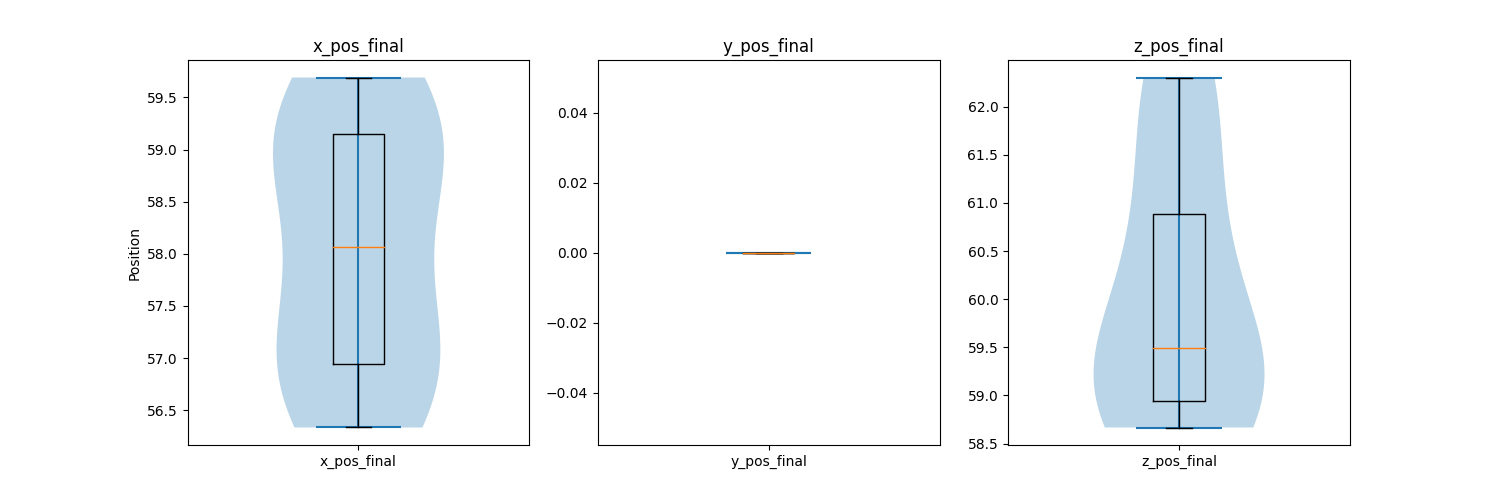

In [24]:
# Gathering Data

x_pos_final = [dataset.x_pos_final for dataset in datastore.find() if dataset.id != 'mean']
y_pos_final = [dataset.y_pos_final for dataset in datastore.find() if dataset.id != 'mean']
z_pos_final = [dataset.z_pos_final for dataset in datastore.find() if dataset.id != 'mean']

# Plotting

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax[0].violinplot(x_pos_final)
ax[0].boxplot(x_pos_final)
ax[1].violinplot(y_pos_final)
ax[1].boxplot(y_pos_final)
ax[2].violinplot(z_pos_final)
ax[2].boxplot(z_pos_final)

ax[0].set_title("x_pos_final")
ax[0].set_ylabel("Position")
ax[0].set_xticklabels(["x_pos_final"])

ax[1].set_title("y_pos_final")
ax[1].set_xticklabels(["y_pos_final"])

ax[2].set_title("z_pos_final")
ax[2].set_xticklabels(["z_pos_final"])

fig.savefig(os.path.join(spec_root, "../05_post-process_data/images/QoIs_violin_box.png"))

# QoI point data violin and box convergence plots

<IPython.core.display.Javascript object>


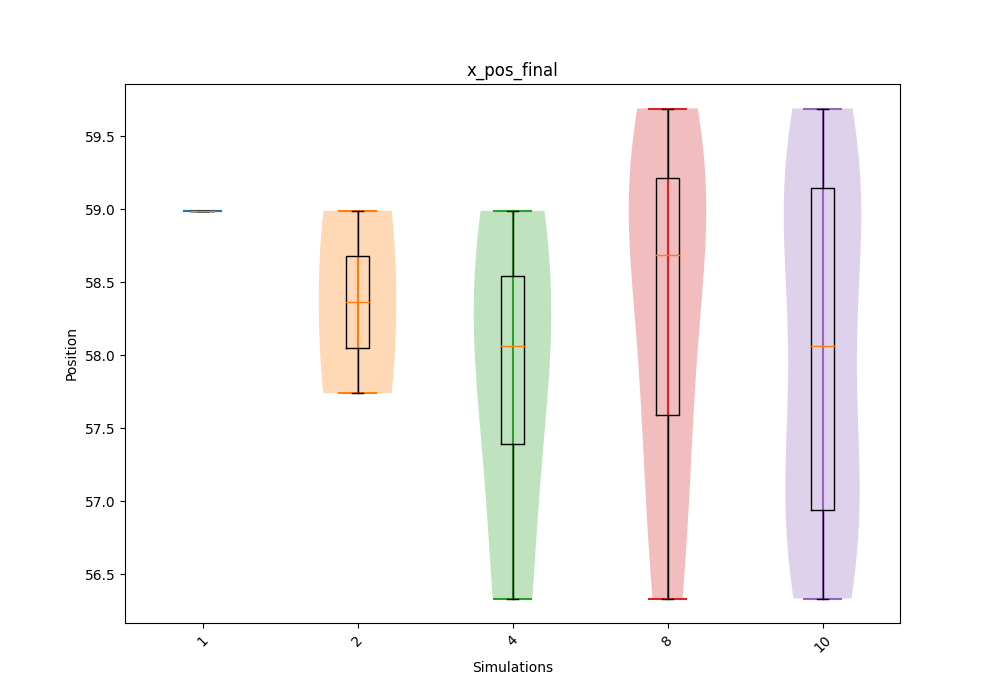

<IPython.core.display.Javascript object>


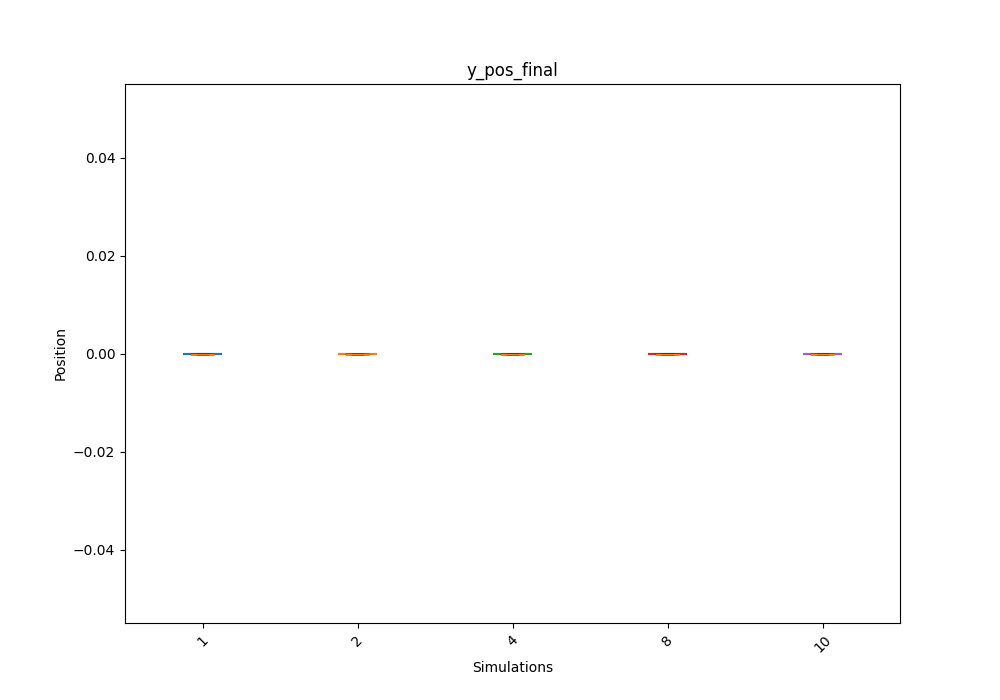

<IPython.core.display.Javascript object>


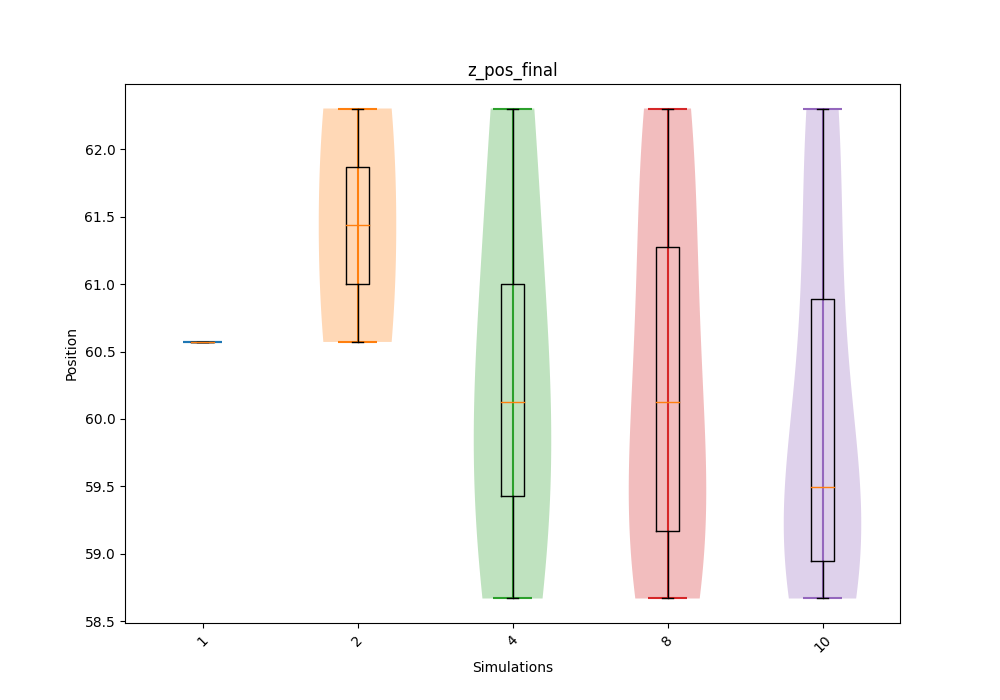

In [42]:
for scalar in scalars:

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 7))

    for i, runs in enumerate(convergence):

        convergence_ids = [group_id + "_" + str(x + 1) for x in range(runs)]  # We can do this because IDs have the run number

        scalar_values = [dataset.list_attributes(True)[scalar] for dataset in datastore.find(id_pool = convergence_ids)]

        ax.violinplot(scalar_values, positions=[i])
        ax.boxplot(scalar_values, positions=[i])

    ax.set_title(scalar)
    ax.set_xlabel("Simulations")
    ax.set_ylabel("Position")
    ax.set_xticklabels(convergence, rotation=45)

    fig.savefig(os.path.join(spec_root, f"../05_post-process_data/images/QoIs_{scalar}_violin_box_convergence.png"))

# QoI point data PDF and CDF plots

<IPython.core.display.Javascript object>


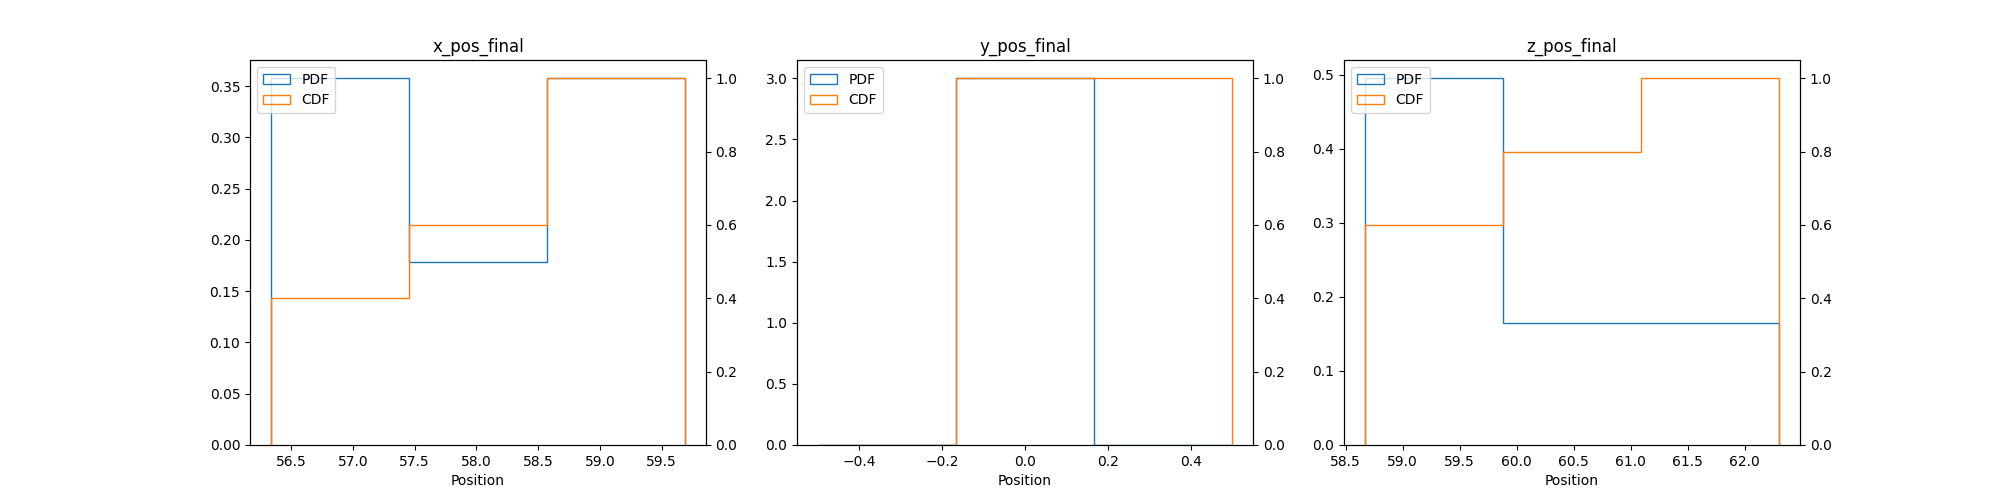

In [43]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

ax1 = []
ax1.append(ax[0].twinx())
ax1.append(ax[1].twinx())
ax1.append(ax[2].twinx())

# x
ax[0].hist(x_pos_final, bins=n_bins, histtype='step', density=True, label='PDF')
ax1[0].hist(x_pos_final, bins=n_bins, histtype='step', density=True, cumulative=True, color=colors[1], label='CDF')

ax[0].set_title("x_pos_final")
ax[0].set_xlabel("Position")
lines, labels = ax[0].get_legend_handles_labels()
lines2, labels2 = ax1[0].get_legend_handles_labels()
ax[0].legend(lines + lines2, labels + labels2, loc='upper left')

# y
ax[1].hist(y_pos_final, bins=n_bins, histtype='step', density=True)
ax1[1].hist(y_pos_final, bins=n_bins, histtype='step', density=True, cumulative=True, color=colors[1])

ax[1].set_title("y_pos_final")
ax[1].set_xlabel("Position")
ax[1].legend(lines + lines2, labels + labels2, loc='upper left')

# z
ax[2].hist(z_pos_final, bins=n_bins, histtype='step', density=True)
ax1[2].hist(z_pos_final, bins=n_bins, histtype='step', density=True, cumulative=True, color=colors[1])

ax[2].set_title("z_pos_final")
ax[2].set_xlabel("Position")
ax[2].legend(lines + lines2, labels + labels2, loc='upper left')

fig.savefig(os.path.join(spec_root, "../05_post-process_data/images/QoIs_pdf_cdf.png"))

# QoI point data PDF and CDF convergence plots

<IPython.core.display.Javascript object>


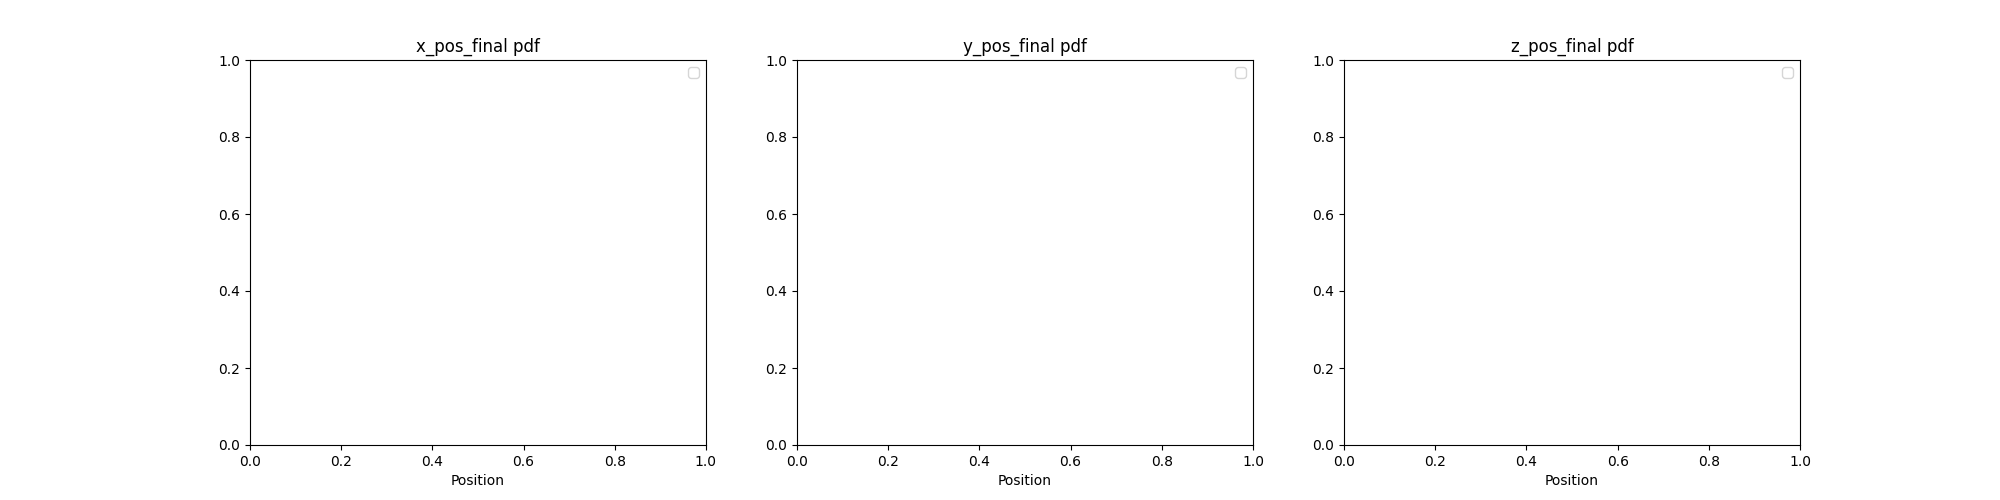

<IPython.core.display.Javascript object>


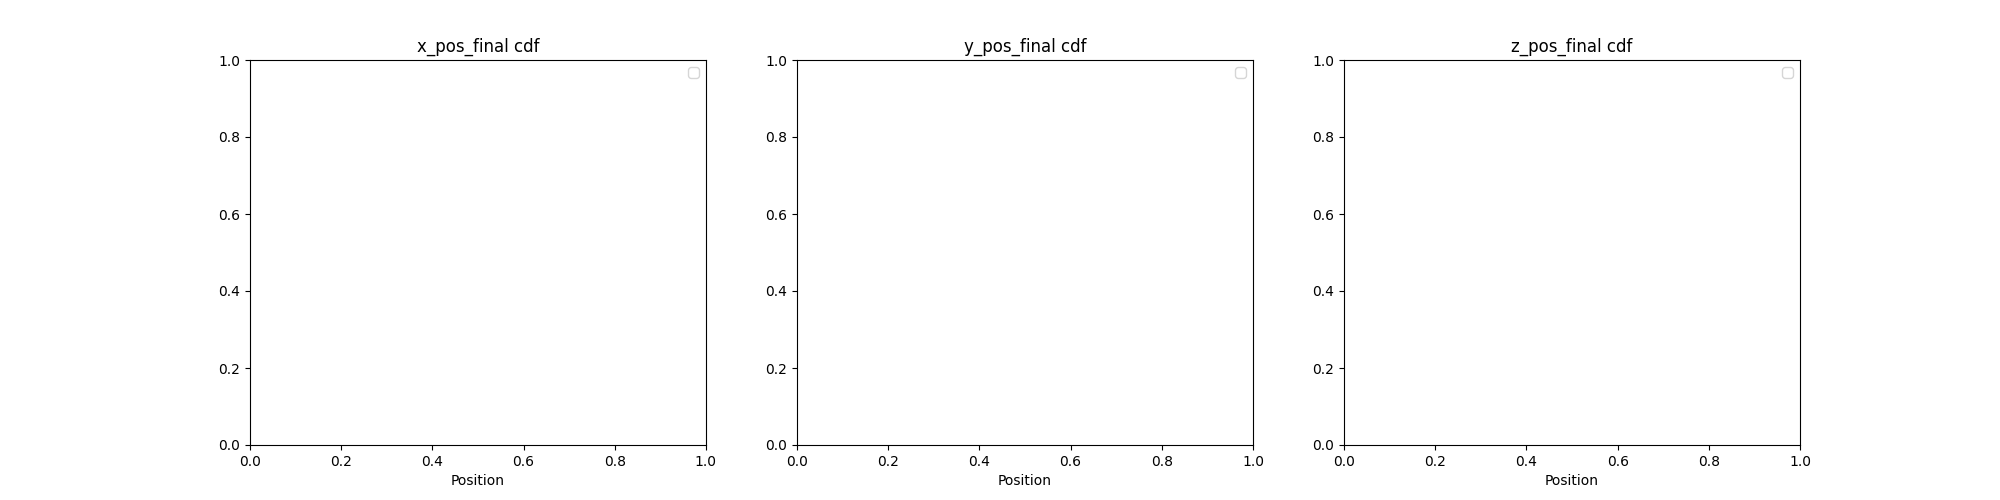

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
fig1, ax1 = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

for i, runs in enumerate(convergence[5:]):  # Depending on number of runs, can obscure the rest

    convergence_ids = [group_id + "_" + str(x + 1) for x in range(runs)]  # We can do this because IDs have the run number

    x_pos_final = [dataset.x_pos_final for dataset in datastore.find(id_pool = convergence_ids)]
    y_pos_final = [dataset.y_pos_final for dataset in datastore.find(id_pool = convergence_ids)]
    z_pos_final = [dataset.z_pos_final for dataset in datastore.find(id_pool = convergence_ids)]

    ax[0].hist(x_pos_final, bins=n_bins, histtype='step', density=True, label=runs)
    ax[1].hist(y_pos_final, bins=n_bins, histtype='step', density=True, label=runs)
    ax[2].hist(z_pos_final, bins=n_bins, histtype='step', density=True, label=runs)

    ax1[0].hist(x_pos_final, bins=n_bins, histtype='step', density=True, cumulative=True, label=runs)
    ax1[1].hist(y_pos_final, bins=n_bins, histtype='step', density=True, cumulative=True, label=runs)
    ax1[2].hist(z_pos_final, bins=n_bins, histtype='step', density=True, cumulative=True, label=runs)

# x
ax[0].set_title("x_pos_final pdf")
ax[0].set_xlabel("Position")
ax[0].legend()

# y
ax[1].set_title("y_pos_final pdf")
ax[1].set_xlabel("Position")
ax[1].legend()

# z
ax[2].set_title("z_pos_final pdf")
ax[2].set_xlabel("Position")
ax[2].legend()

fig.savefig(os.path.join(spec_root, "../05_post-process_data/images/QoIs_pdf_convergence.png"))

# x
ax1[0].set_title("x_pos_final cdf")
ax1[0].set_xlabel("Position")
ax1[0].legend()

# y
ax1[1].set_title("y_pos_final cdf")
ax1[1].set_xlabel("Position")
ax1[1].legend()

# z
ax1[2].set_title("z_pos_final cdf")
ax1[2].set_xlabel("Position")
ax1[2].legend()

fig1.savefig(os.path.join(spec_root, "../05_post-process_data/images/QoIs_cdf_convergence.png"))

# QoI point data parameter correlation scatter plots

<IPython.core.display.Javascript object>


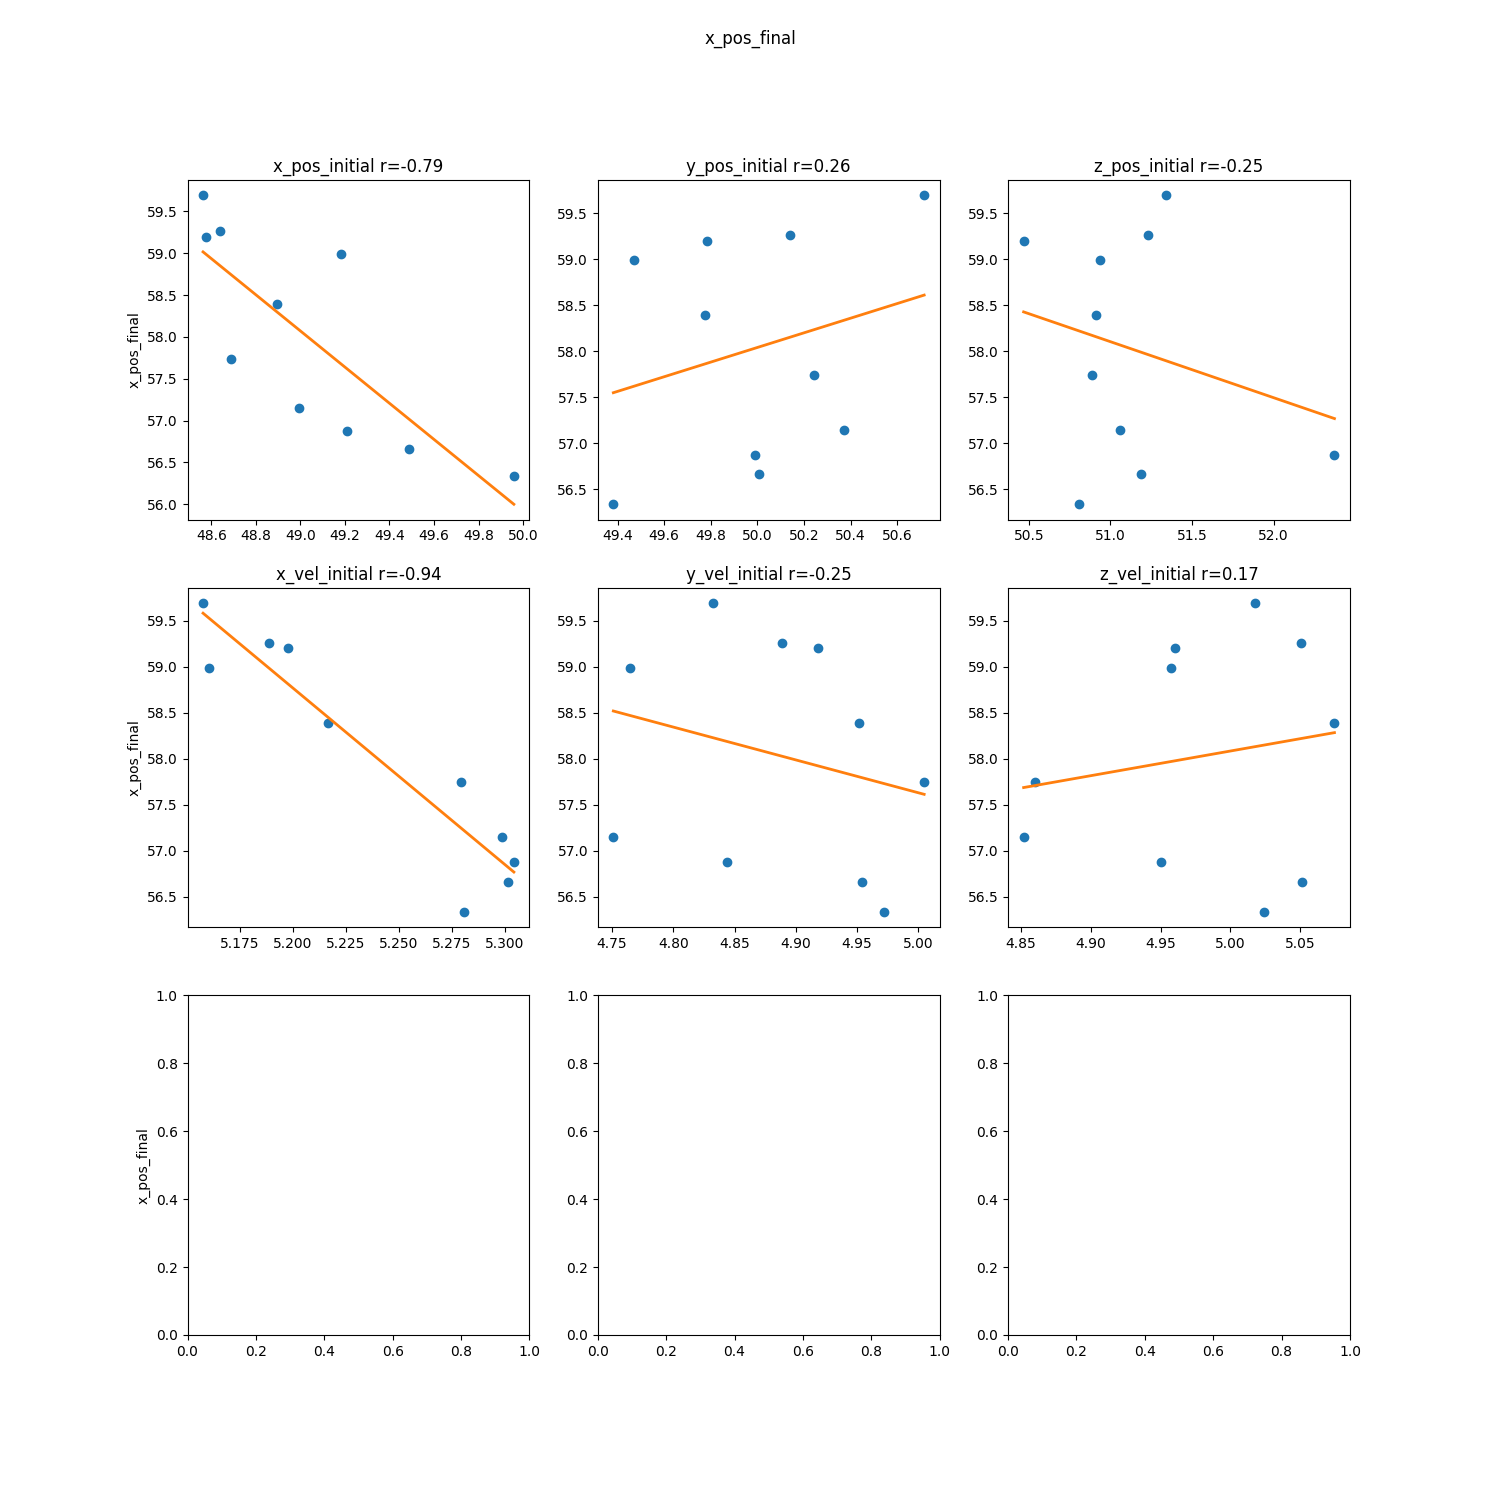

m: -2.1604848047965, r: -0.793050696919259
m: 0.795793664171554, r: 0.26233747183967365
m: -0.6087416675625178, r: -0.24956421713967025
m: -19.215692817769977, r: -0.9370882737283791
m: -3.569033537169959, r: -0.2540406598549216
m: 2.6771284468024135, r: 0.17020421936058935


<IPython.core.display.Javascript object>


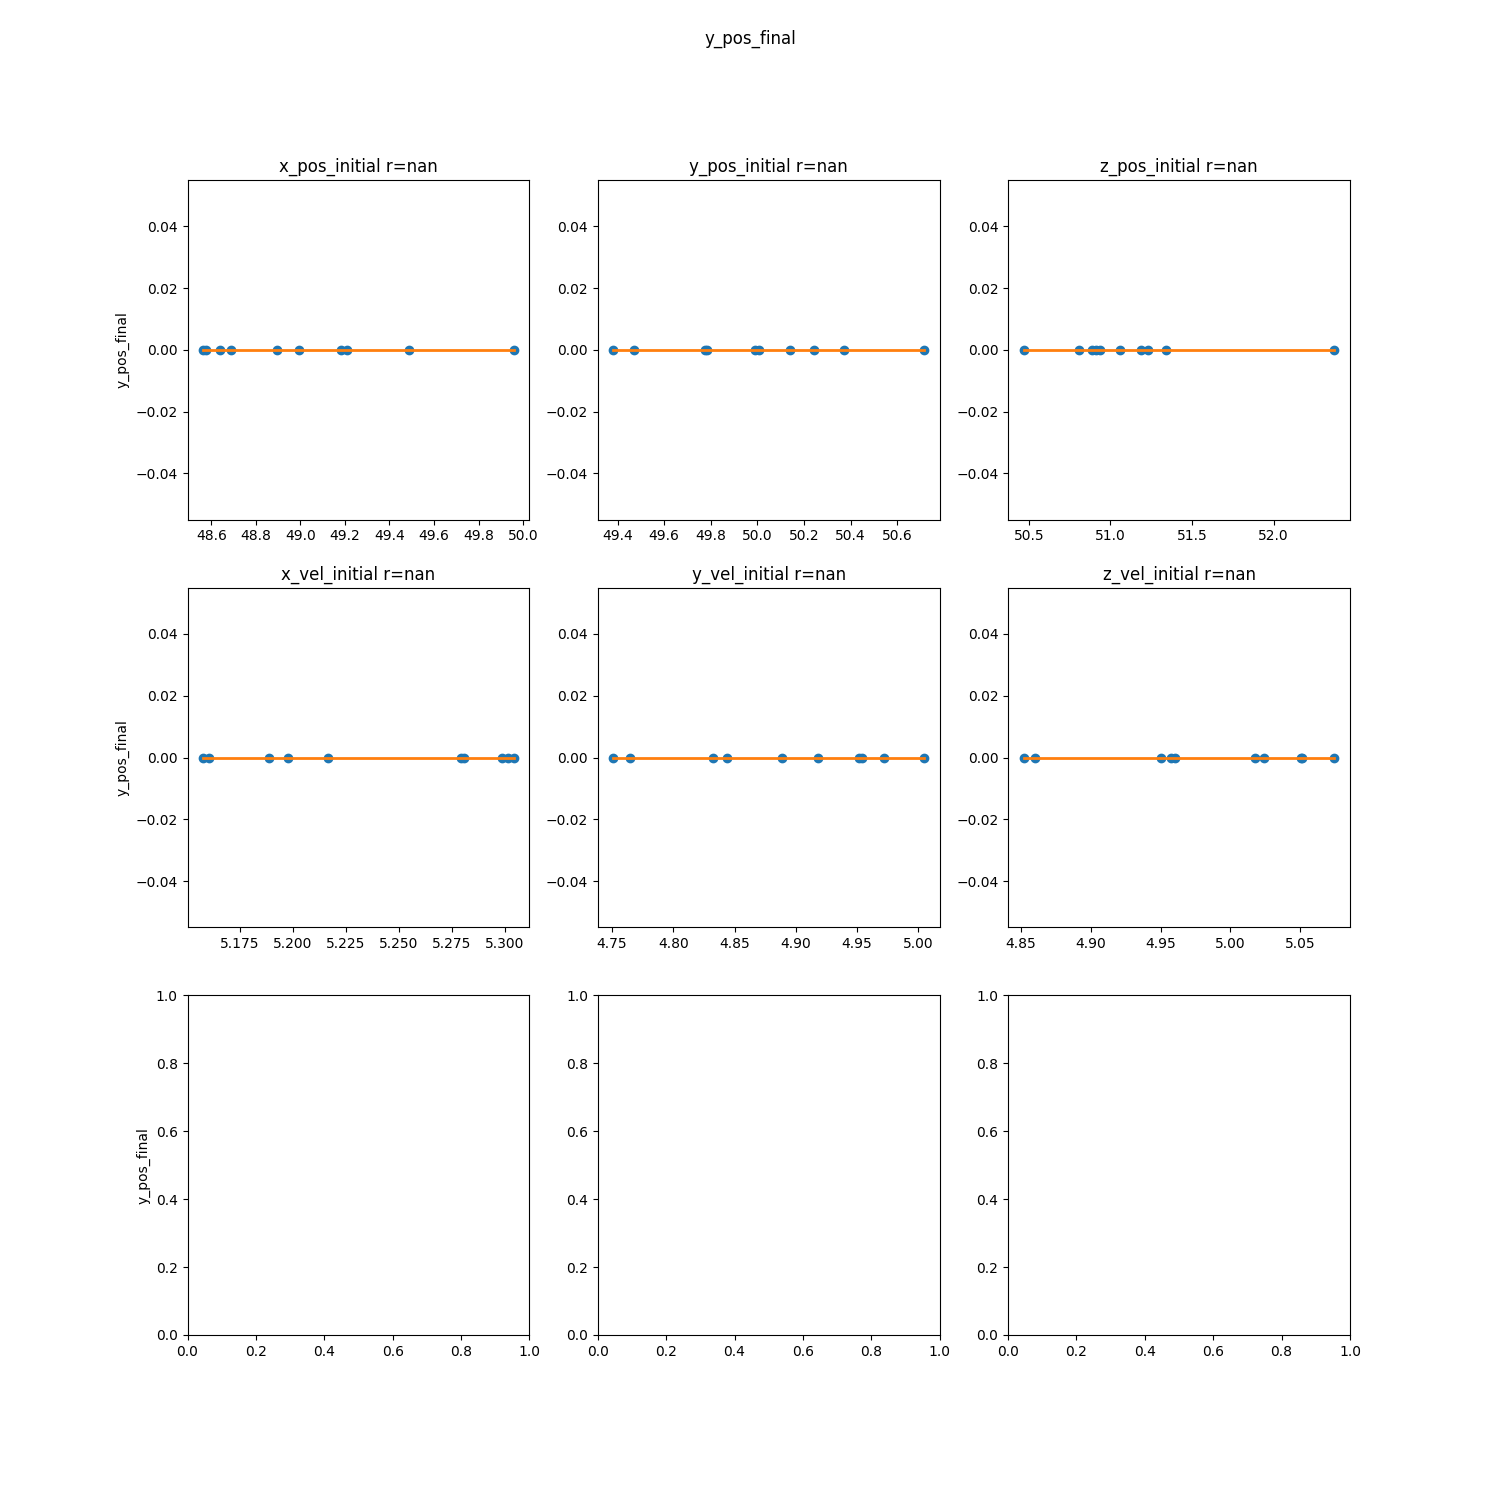

m: 0.0, r: nan
m: 0.0, r: nan
m: 0.0, r: nan
m: 0.0, r: nan
m: 0.0, r: nan
m: 0.0, r: nan


<IPython.core.display.Javascript object>


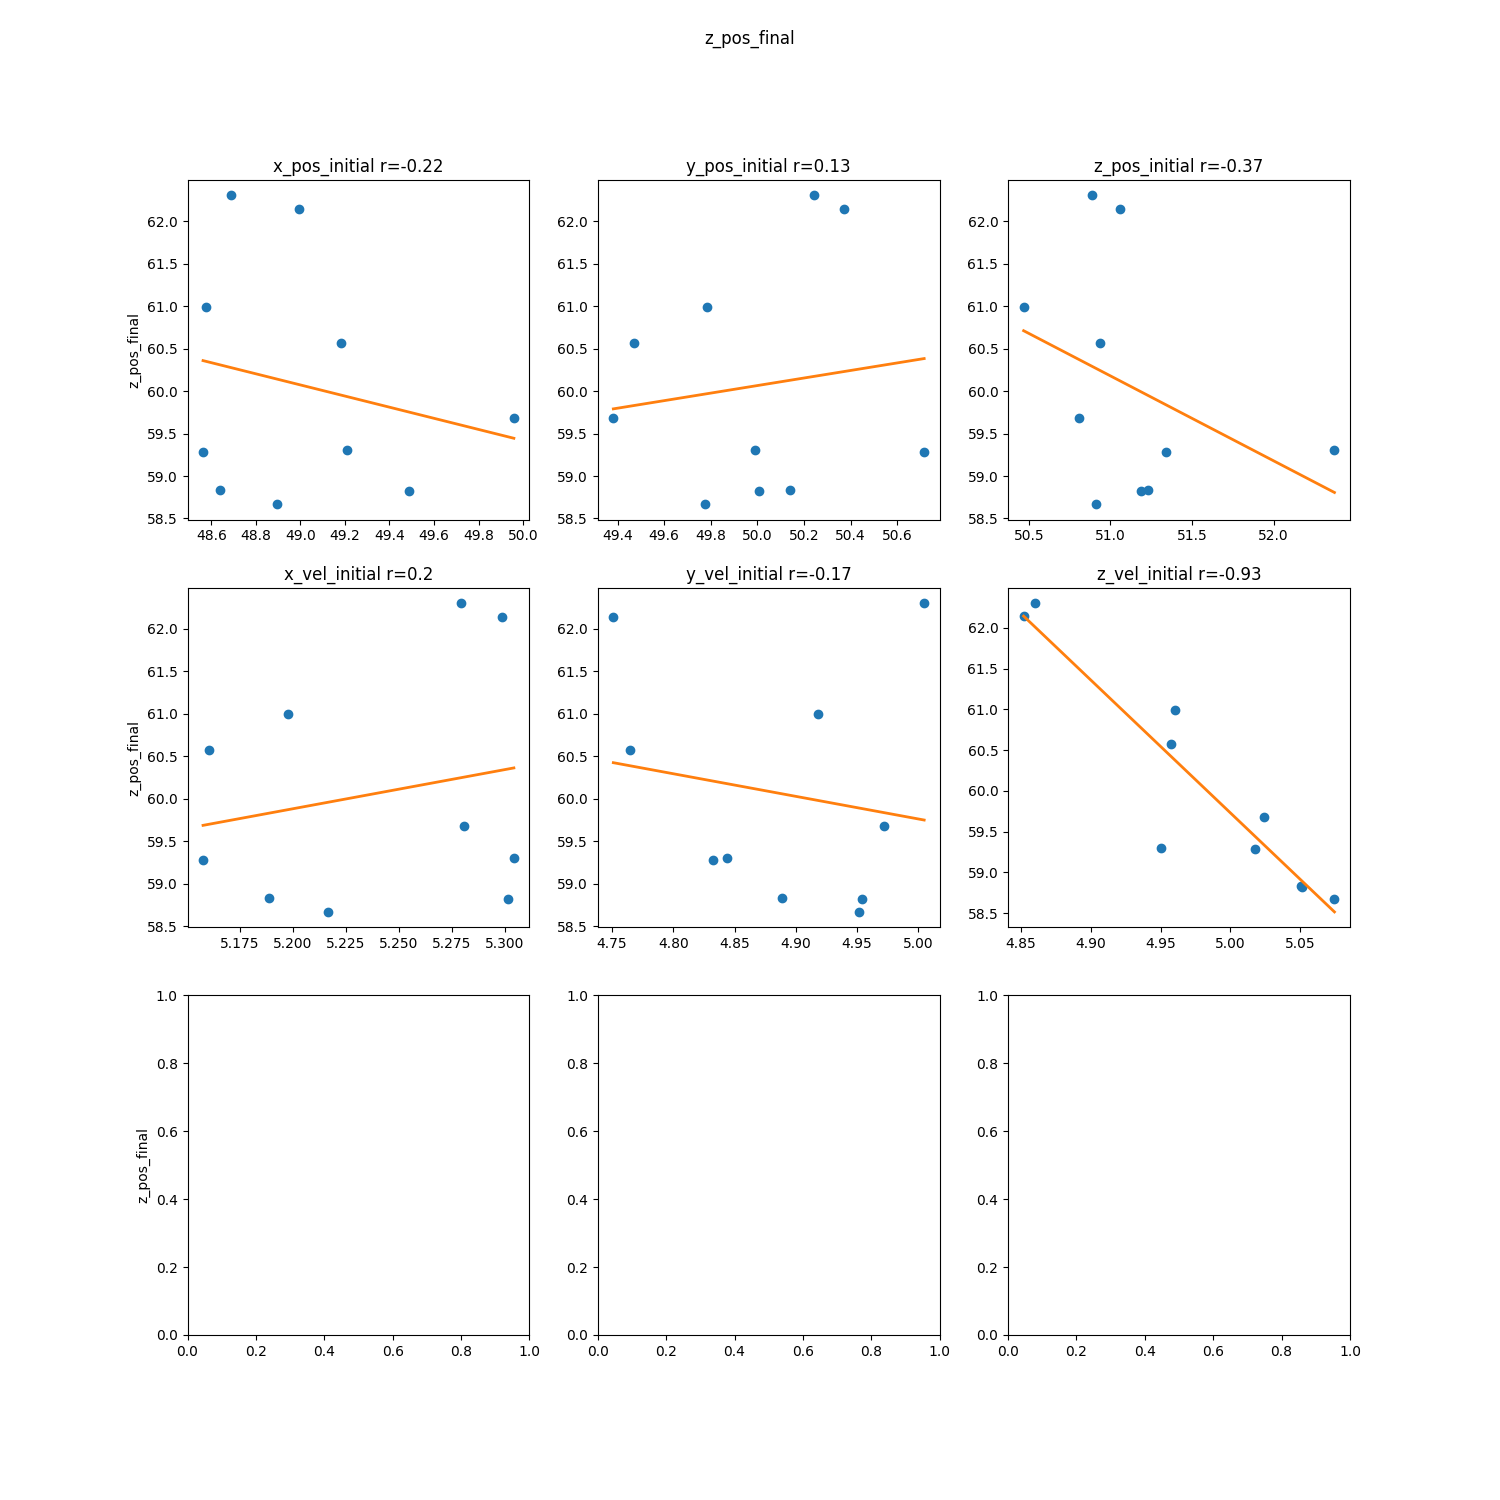

m: -0.6547841545196222, r: -0.21664486350254536
m: 0.44427710687065547, r: 0.13201226649795178
m: -1.0001816433341721, r: -0.3695971947045929
m: 4.618388126746284, r: 0.2030090432520204
m: -2.661693018132357, r: -0.17076979976930384
m: -16.279118946767532, r: -0.9328944518488644


In [51]:
num_plts = len(parameters)
rows_cols = math.ceil(math.sqrt(num_plts))

all_scalars = scalars + parameters

corrcoefs = {}  # Correlation Coefficient Dictionary that will be used in the next two cells

for i, runs in enumerate(convergence):

    convergence_ids = [group_id + "_" + str(x + 1) for x in range(runs)]  # We can do this because IDs have the run number

    corrcoefs[runs] = {}

    for scalar in scalars:

        if runs == convergence[-1]:  # Just plot the last set of simulations

            fig, ax = plt.subplots(nrows=rows_cols, ncols=rows_cols, figsize=(rows_cols * 5, rows_cols * 5))

            fig.suptitle(scalar)

            i = 0
            j = 0
            ax[j, i].set_ylabel(scalar)

        scalar_values = [dataset.list_attributes(True)[scalar] for dataset in datastore.find(id_pool = convergence_ids)]

        corrcoefs[runs][scalar] = {}

        for parameter in parameters:

            parameter_values = [dataset.list_attributes(True)[parameter] for dataset in datastore.find(id_pool = convergence_ids)]

            r = np.corrcoef(parameter_values, scalar_values)[0, 1]
            corrcoefs[runs][scalar][parameter] = r

            if runs == convergence[-1]:  # Just plot the last set of simulations

                m, b = np.polyfit(parameter_values, scalar_values, 1)
                print(f"m: {m}, r: {r}")
                x = np.linspace(min(parameter_values), max(parameter_values))
                y = m * x + b

#                 slope, intercept, r, p, se = stats.linregress(x, y)

                ax[j, i].scatter(parameter_values, scalar_values)
                ax[j, i].plot(x, y, color=colors[1], linewidth=2.0)
                ax[j, i].set_title(f"{parameter} r={round(r, 2)}")

                if i == rows_cols - 1:  # Cycling through subplots

                    i = 0
                    j += 1
                    ax[j, i].set_ylabel(scalar)

                else:

                    i += 1

        if runs == convergence[-1]:  # Just plot the last set of simulations
            fig.savefig(os.path.join(spec_root, f"../05_post-process_data/images/QoIs_{scalar}_correlation.png"))

# QoI point data parameter correlation heatmaps

<IPython.core.display.Javascript object>


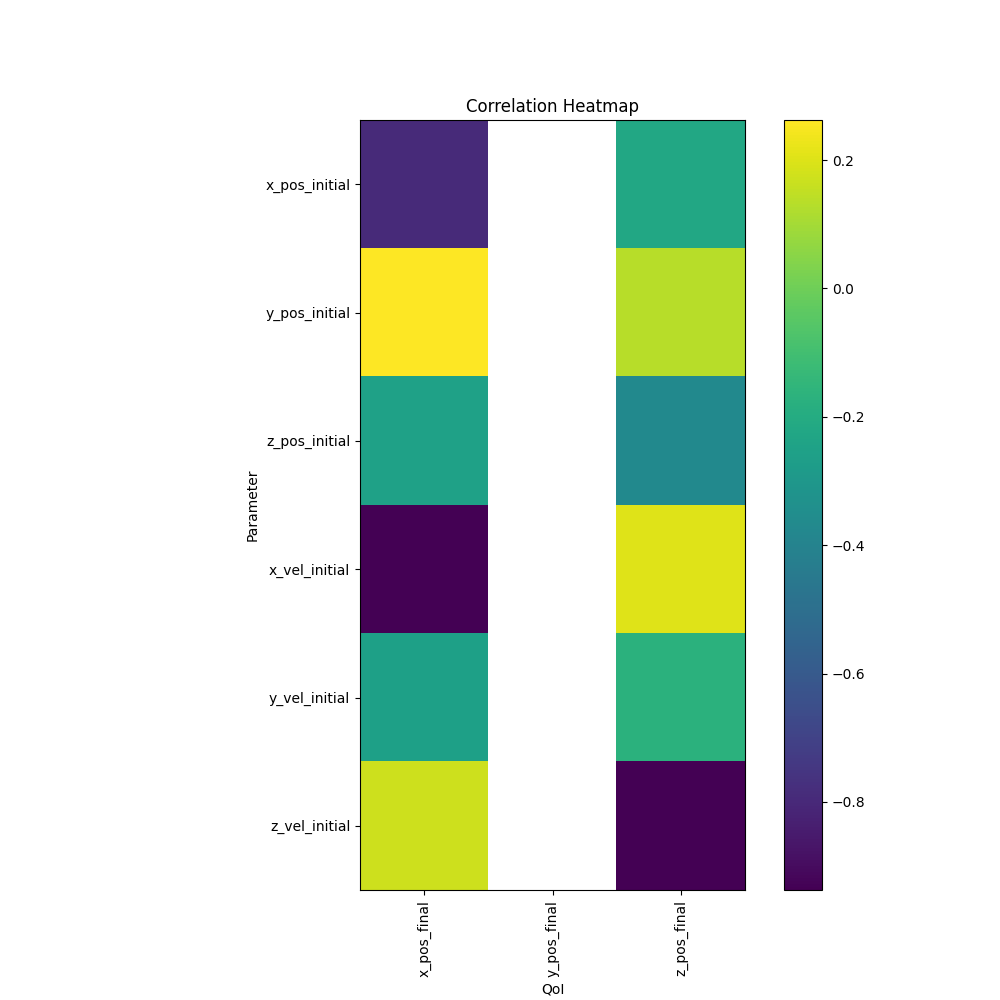

In [52]:
i = 0
j = 0

cc_matrix = np.zeros((len(parameters), len(scalars)))

for scalar in scalars:

    for parameter in parameters:

        cc_matrix[i, j] = corrcoefs[convergence[-1]][scalar][parameter]
        i += 1

    i = 0
    j += 1

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
im = ax.imshow(cc_matrix)
cbar = ax.figure.colorbar(im, ax=ax)

ax.set_title("Correlation Heatmap")

ax.set_xlabel("QoI")
ax.set_xticks(np.arange(len(scalars)))
ax.set_xticklabels(scalars, rotation=90, ha='center', minor=False)

ax.set_ylabel("Parameter")
ax.set_yticks(np.arange(len(parameters)))
ax.set_yticklabels(parameters, minor=False)

fig.savefig(os.path.join(spec_root, '../05_post-process_data/images/QoIs_correlation_heatmap'))

# QoI point data parameter correlation convergence heatmaps

<IPython.core.display.Javascript object>


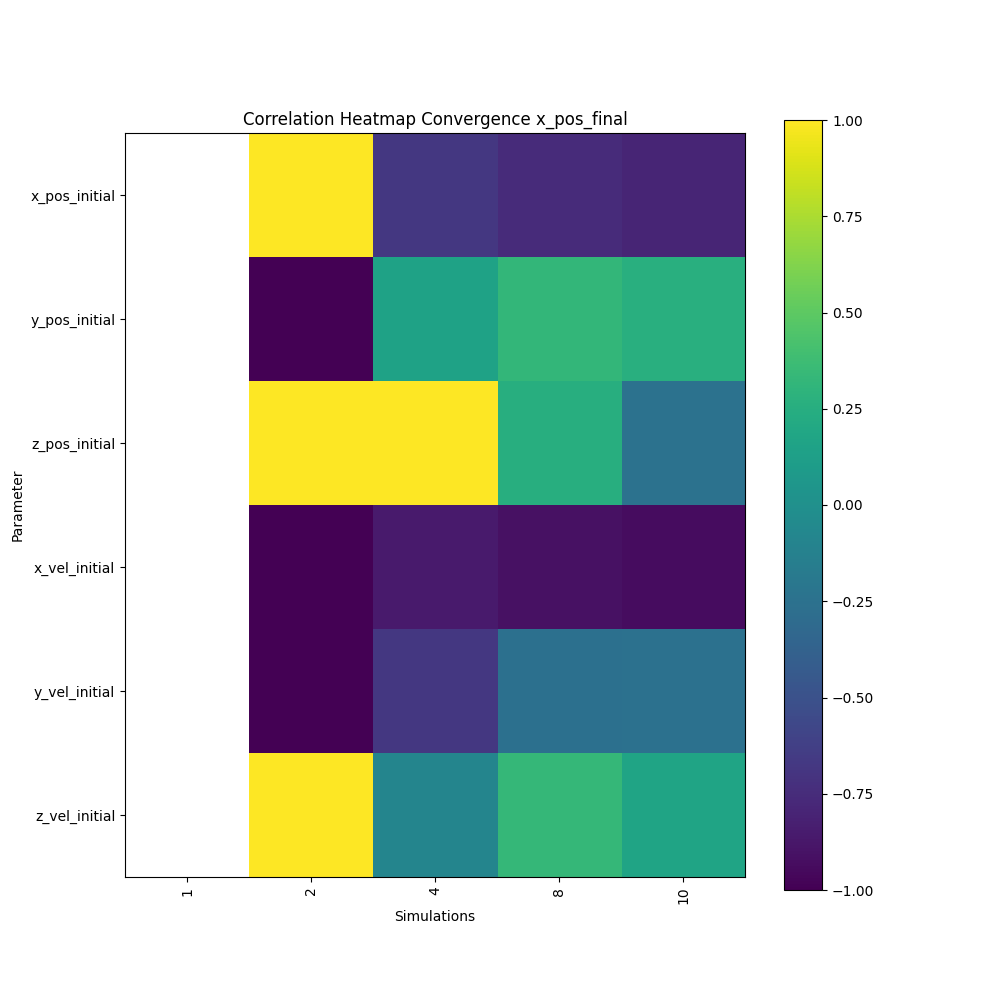

<IPython.core.display.Javascript object>


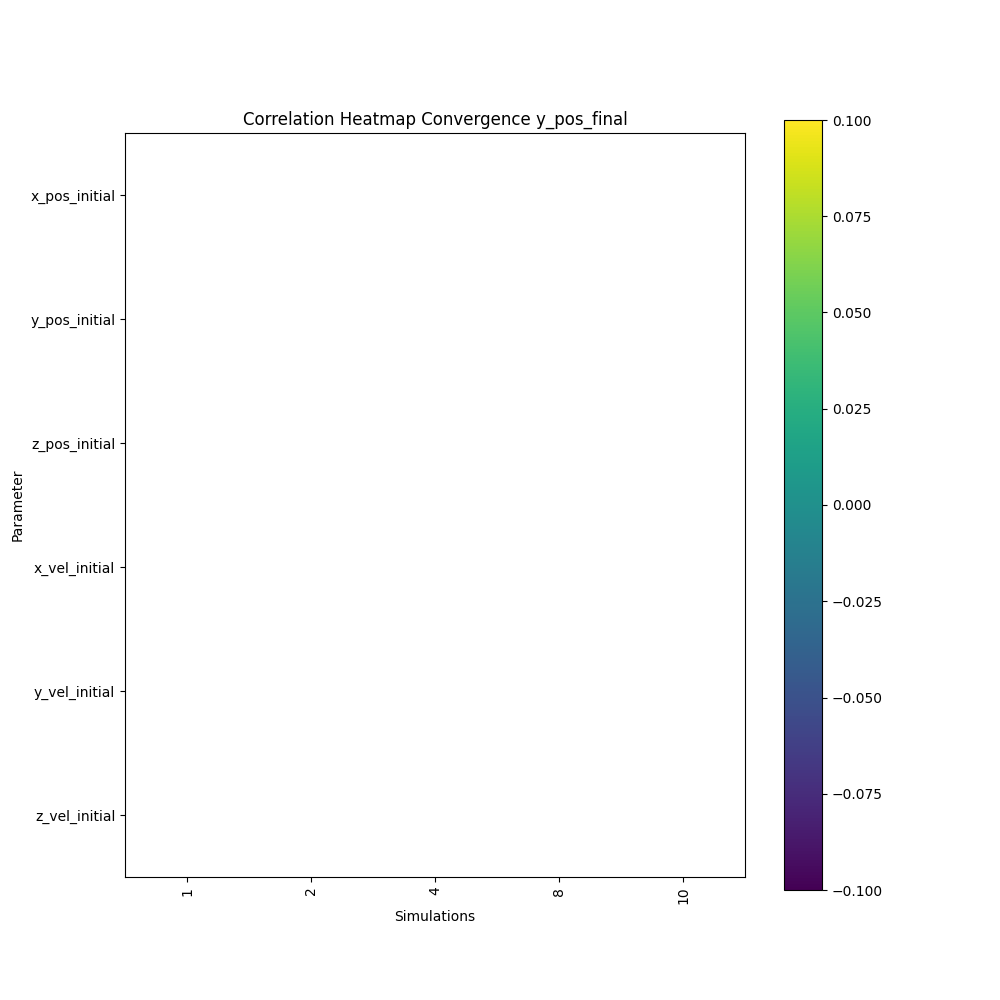

<IPython.core.display.Javascript object>


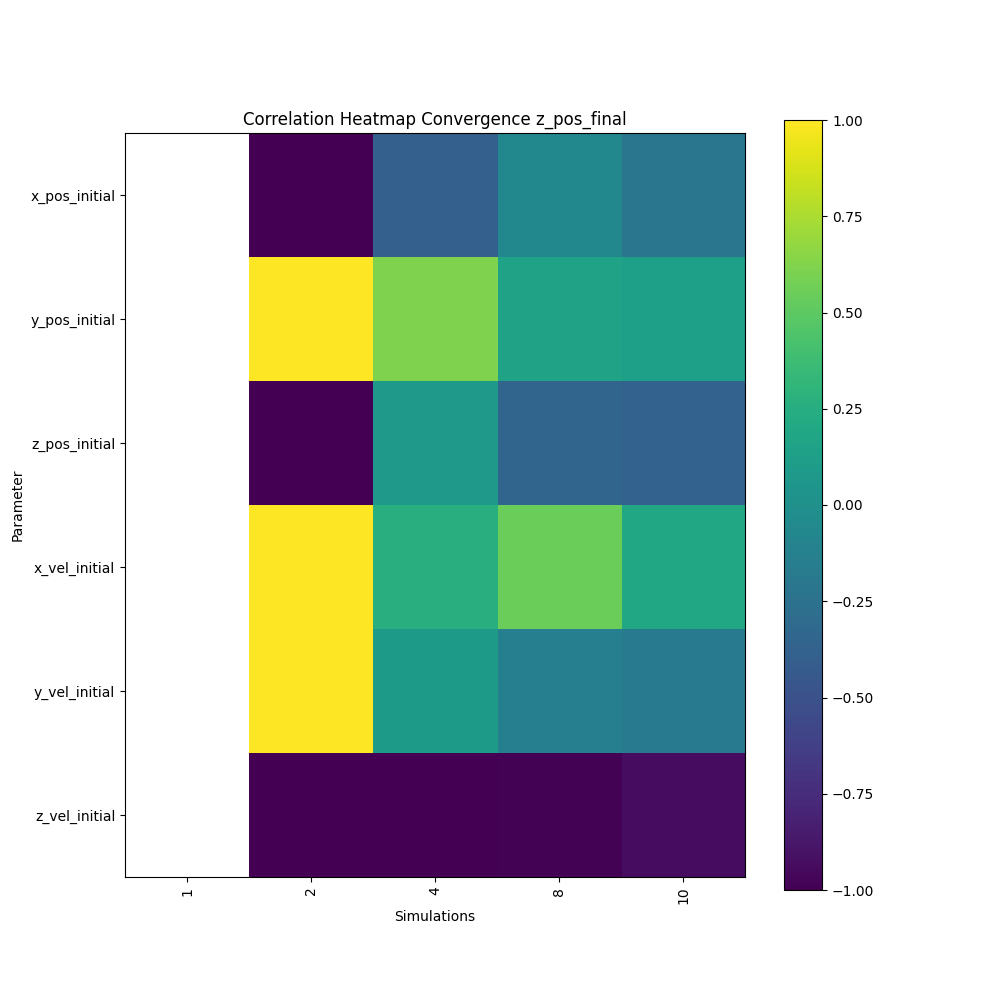

In [53]:
i = 0
j = 0

cc_matrix = np.zeros((len(parameters), len(convergence)))

for scalar in scalars:

    for runs in convergence:

        for parameter in parameters:

            cc_matrix[i, j] = corrcoefs[runs][scalar][parameter]
            i += 1

        i = 0
        j += 1

    i = 0
    j = 0

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    im = ax.imshow(cc_matrix)
    cbar = ax.figure.colorbar(im, ax=ax)

    ax.set_title(f"Correlation Heatmap Convergence {scalar}")

    ax.set_xlabel("Simulations")
    ax.set_xticks(np.arange(len(convergence)))
    ax.set_xticklabels(convergence, rotation=90, ha='center', minor=False)

    ax.set_ylabel("Parameter")
    ax.set_yticks(np.arange(len(parameters)))
    ax.set_yticklabels(parameters, minor=False)

    fig.savefig(os.path.join(spec_root, f'../05_post-process_data/images/QoIs_{scalar}_correlation_heatmap_convergence'))

# Adding up the uncertainties

## Adding common timestep data to Ensembles

In [ ]:
# Numerical Resolution
# Be sure to run 01_baseline_simulation/num_res/visualization_num_res.ipynb to acquire necessary data
mean_num_res = recs_num_res.get('mean')
mean_set_num_res = mean_num_res.get_curve_set("mean_data")
time_num_res = mean_set_num_res.get_independent('time_common')['value']

# Ensembles
mean = recs.get('mean')
mean_set = mean.get_curve_set("mean_data")
time = mean_set.get_independent('time')['value']
x_pos_mean = mean_set.get_dependent('x_pos_mean')['value']
y_pos_mean = mean_set.get_dependent('y_pos_mean')['value']
z_pos_mean = mean_set.get_dependent('z_pos_mean')['value']
x_pos_std = mean_set.get_dependent('x_pos_std')['value']
y_pos_std = mean_set.get_dependent('y_pos_std')['value']
z_pos_std = mean_set.get_dependent('z_pos_std')['value']

x_pos_mean_common = []
y_pos_mean_common = []
z_pos_mean_common = []
x_pos_std_common = []
y_pos_std_common = []
z_pos_std_common = []
time_common = []

for i, t in enumerate(time):

    for t2 in time_num_res:

        if t == t2:

            x_pos_mean_common.append(x_pos_mean[i])
            y_pos_mean_common.append(y_pos_mean[i])
            z_pos_mean_common.append(z_pos_mean[i])
            x_pos_std_common.append(x_pos_std[i])
            y_pos_std_common.append(y_pos_std[i])
            z_pos_std_common.append(z_pos_std[i])
            time_common.append(time[i])

common_set = mean.add_curve_set("common_data")
common_set.add_independent('time_common', time_common)
common_set.add_dependent('x_pos_mean_common', x_pos_mean_common)
common_set.add_dependent('y_pos_mean_common', y_pos_mean_common)
common_set.add_dependent('z_pos_mean_common', z_pos_mean_common)
common_set.add_dependent('x_pos_std_common', x_pos_std_common)
common_set.add_dependent('y_pos_std_common', y_pos_std_common)
common_set.add_dependent('z_pos_std_common', z_pos_std_common)

recs.update(mean)  # need to update or else won't save!!!!!

## Calculating Validation Uncertainty

In [ ]:
# Numerical Resolution: Numerical Uncertainty (u_num)
# Be sure to run 01_baseline_simulation/num_res/visualization_num_res.ipynb to acquire necessary data
x_pos_std_num_res = mean_set_num_res.get_dependent('x_pos_std')['value']
y_pos_std_num_res = mean_set_num_res.get_dependent('y_pos_std')['value']
z_pos_std_num_res = mean_set_num_res.get_dependent('z_pos_std')['value']

# Ensembles: Input Uncertainty (u_input)
x_pos_mean_common = common_set.get_dependent('x_pos_mean_common')['value']
x_pos_mean_common = common_set.get_dependent('x_pos_mean_common')['value']
y_pos_mean_common = common_set.get_dependent('y_pos_mean_common')['value']
z_pos_mean_common = common_set.get_dependent('z_pos_mean_common')['value']
x_pos_std_common = common_set.get_dependent('x_pos_std_common')['value']
y_pos_std_common = common_set.get_dependent('y_pos_std_common')['value']
z_pos_std_common = common_set.get_dependent('z_pos_std_common')['value']

# Experiment: Experimental Uncertainty (u_D)
u_D_x = [statistics.mean([x, y]) for x, y in zip(x_pos_std_num_res, x_pos_std_common)]
u_D_y = [statistics.mean([x, y]) for x, y in zip(y_pos_std_num_res, y_pos_std_common)]
u_D_z = [statistics.mean([x, y]) for x, y in zip(z_pos_std_num_res, z_pos_std_common)]

# Validation Uncertainty (u_val)
u_val_x = np.sqrt(np.square(x_pos_std_num_res) + np.square(x_pos_std_common) + np.square(u_D_x))
u_val_y = np.sqrt(np.square(y_pos_std_num_res) + np.square(y_pos_std_common) + np.square(u_D_y))
u_val_z = np.sqrt(np.square(z_pos_std_num_res) + np.square(z_pos_std_common) + np.square(u_D_z))

# Plotting
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax[0].plot(time_common, x_pos_std_num_res, label='$u_{num}$')
ax[1].plot(time_common, y_pos_std_num_res, label='$u_{num}$')
ax[2].plot(time_common, z_pos_std_num_res, label='$u_{num}$')

ax[0].plot(time_common, x_pos_std_common, label='$u_{input}$')
ax[1].plot(time_common, y_pos_std_common, label='$u_{input}$')
ax[2].plot(time_common, z_pos_std_common, label='$u_{input}$')

ax[0].plot(time_common, u_D_x, label='$u_{D}$')
ax[1].plot(time_common, u_D_y, label='$u_{D}$')
ax[2].plot(time_common, u_D_z, label='$u_{D}$')

ax[0].plot(time_common, u_val_x, label='$u_{val}$')
ax[1].plot(time_common, u_val_y, label='$u_{val}$')
ax[2].plot(time_common, u_val_z, label='$u_{val}$')

ax[0].set_title("x uncertainties")
ax[1].set_title("y uncertainties")
ax[2].set_title("z uncertainties")

ax[0].set_xlabel("time")
ax[1].set_xlabel("time")
ax[2].set_xlabel("time")

ax[0].set_ylabel("Position")
ax[1].set_ylabel("Position")
ax[2].set_ylabel("Position")

ax[0].legend()
ax[1].legend()
ax[2].legend()

fig.savefig(os.path.join(spec_root, "../05_post-process_data/images/QoIs_u_all.png"))

## Plotting Validation Uncertainty

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax[0].plot(time_common, x_pos_mean_common)
ax[1].plot(time_common, y_pos_mean_common)
ax[2].plot(time_common, z_pos_mean_common)

ax[0].fill_between(time_common, x_pos_mean_common + 2 * u_val_x, x_pos_mean_common - 2 * u_val_x, alpha=0.25)
ax[1].fill_between(time_common, y_pos_mean_common + 2 * u_val_y, y_pos_mean_common - 2 * u_val_y, alpha=0.25)
ax[2].fill_between(time_common, z_pos_mean_common + 2 * u_val_z, z_pos_mean_common - 2 * u_val_z, alpha=0.25)

ax[0].plot(time_true, x_true)
ax[1].plot(time_true, y_true)
ax[2].plot(time_true, z_true)

ax[0].set_title("x_pos with u_val_x")
ax[1].set_title("y_pos with u_val_y")
ax[2].set_title("z_pos with u_val_z")

ax[0].set_xlabel("time")
ax[1].set_xlabel("time")
ax[2].set_xlabel("time")

ax[0].set_ylabel("Position")
ax[1].set_ylabel("Position")
ax[2].set_ylabel("Position")

ax[0].legend(labels=['Simulation Mean', '$\mu \pm 2 \sigma$', 'Validation Data'])
ax[1].legend(labels=['Simulation Mean', '$\mu \pm 2 \sigma$', 'Validation Data'])
ax[2].legend(labels=['Simulation Mean', '$\mu \pm 2 \sigma$', 'Validation Data'])
fig.savefig(os.path.join(spec_root, "../05_post-process_data/images/QoIs_u_val.png"))

# Quantification of Margins and Uncertainties (QMU)

In [ ]:
# Gathering Data

# Data spanning 4 standard deviations
x_list = np.linspace(x_pos_mean_common[-1] - 4 * u_val_x[-1], x_pos_mean_common[-1] + 4 * u_val_x[-1])
y_list = np.linspace(y_pos_mean_common[-1] - 4 * u_val_y[-1], y_pos_mean_common[-1] + 4 * u_val_y[-1])
z_list = np.linspace(z_pos_mean_common[-1] - 4 * u_val_z[-1], z_pos_mean_common[-1] + 4 * u_val_z[-1])

# Normal Distribution
x_dist = 1 / (np.sqrt(2 * np.pi * u_val_x[-1]**2)) * np.exp(- (x_list - x_pos_mean_common[-1])**2 / (2 * u_val_x[-1]**2))
y_dist = 1 / (np.sqrt(2 * np.pi * u_val_y[-1]**2)) * np.exp(- (y_list - y_pos_mean_common[-1])**2 / (2 * u_val_y[-1]**2))
z_dist = 1 / (np.sqrt(2 * np.pi * u_val_z[-1]**2)) * np.exp(- (z_list - z_pos_mean_common[-1])**2 / (2 * u_val_z[-1]**2))

# Requirement
Req_x = 75
Req_y = 5
Req_z = 80

# Margin Factor
MF_x = (Req_x - x_pos_mean_common[-1]) / u_val_x[-1]
MF_y = (Req_y - y_pos_mean_common[-1]) / u_val_y[-1]
MF_z = (Req_z - z_pos_mean_common[-1]) / u_val_z[-1]

print(MF_x, MF_y, MF_z)

# Plotting

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax[0].plot(x_list, x_dist, label='Normal PDF $f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{x-\mu}{2\sigma^2}}$')
ax[1].plot(y_list, y_dist, label='Normal PDF $f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{x-\mu}{2\sigma^2}}$')
ax[2].plot(z_list, z_dist, label='Normal PDF $f(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{x-\mu}{2\sigma^2}}$')

ax[0].plot([x_pos_mean_common[-1], x_pos_mean_common[-1]], [0, max(x_dist)], label=f'$\mu=${round(x_pos_mean_common[-1], 2)} with $\sigma=${round(u_val_x[-1], 2)}')
ax[1].plot([y_pos_mean_common[-1], y_pos_mean_common[-1]], [0, max(y_dist)], label=f'$\mu=${round(y_pos_mean_common[-1], 2)} with $\sigma=${round(u_val_y[-1], 2)}')
ax[2].plot([z_pos_mean_common[-1], z_pos_mean_common[-1]], [0, max(z_dist)], label=f'$\mu=${round(z_pos_mean_common[-1], 2)} with $\sigma=${round(u_val_z[-1], 2)}')

ax[0].plot([Req_x, Req_x], [0, max(x_dist)], label=f'$Req_x$ = {Req_x}')
ax[1].plot([Req_y, Req_y], [0, max(y_dist)], label=f'$Req_y$ = {Req_y}')
ax[2].plot([Req_z, Req_z], [0, max(z_dist)], label=f'$Req_z$ = {Req_z}')

ax[0].plot([x_pos_mean_common[-1], Req_x], [max(x_dist), max(x_dist)], label=f'$MF_x$ = {round(MF_x, 2)}')
ax[1].plot([y_pos_mean_common[-1], Req_y], [max(y_dist), max(y_dist)], label=f'$MF_y$ = {round(MF_y, 2)}')
ax[2].plot([z_pos_mean_common[-1], Req_z], [max(z_dist), max(z_dist)], label=f'$MF_z$ = {round(MF_z, 2)}')

ax[0].set_title("x_pos_final with u_val_x_final")
ax[1].set_title("y_pos_final with u_val_y_final")
ax[2].set_title("z_pos_final with u_val_z_final")

ax[0].set_xlabel("Position")
ax[1].set_xlabel("Position")
ax[2].set_xlabel("Position")

ax[0].legend(loc='lower left')
ax[1].legend(loc='lower left')
ax[2].legend(loc='lower left')

fig.savefig(os.path.join(spec_root, "../05_post-process_data/images/QoIs_QMU.png"))